In [413]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

%matplotlib widget

#### Tentativi di creare network

##### Metodo 1: grafo diretto
`nx.scale_free_graph` si rifà a un paper di [Bollobás et al., 2003](http://jenniferchayes.com/Papers/dirSCgrph.pdf).

Crea una rete diretta a partire da quattro parametri, $\alpha$, $\beta$, $\gamma$, $\delta_{in}$ e $\delta_{out}$, e dal paper so che la distributione degli in-degree è legge di potenza, $\propto deg^{-k}$, con
$$k = 1+\frac 1 {c_1} \qquad \qquad c_1=\frac{\alpha+\beta}{1+\delta_{in}(\alpha+\gamma)}$$
Idem scambiando $\alpha$ con $\gamma$ per gli outdegree.

Questo è un grafo diretto e non so cosa succede trasformandolo brutalmente in indiretto

In [414]:
n=10000
alpha = 0.85/2
gamma = alpha
beta = 1-alpha-gamma
print(alpha,beta,gamma)
c1 = (alpha+beta)
distribution_gamma = 1+1/c1
print(distribution_gamma)

0.425 0.14999999999999997 0.425
2.739130434782609


In [415]:
DG = nx.scale_free_graph(n=n,alpha=alpha,beta=beta,gamma=gamma,delta_in=0.,delta_out=0.)
G= DG.to_undirected()
G=nx.Graph(G) # toglie link ridondanti
G.remove_edges_from(nx.selfloop_edges(G)) # toglie self-loops, e anche questo modifica la distribuzione di grado
G.edges(0)

EdgeDataView([(0, 1), (0, 9), (0, 29), (0, 41), (0, 82), (0, 83), (0, 88), (0, 91), (0, 111), (0, 158), (0, 102), (0, 222), (0, 258), (0, 274), (0, 302), (0, 320), (0, 357), (0, 363), (0, 372), (0, 75), (0, 469), (0, 2), (0, 526), (0, 532), (0, 602), (0, 604), (0, 608), (0, 612), (0, 156), (0, 374), (0, 810), (0, 825), (0, 547), (0, 879), (0, 883), (0, 649), (0, 928), (0, 932), (0, 998), (0, 1028), (0, 1052), (0, 1113), (0, 1122), (0, 1209), (0, 1282), (0, 1327), (0, 1379), (0, 1387), (0, 23), (0, 1489), (0, 103), (0, 1651), (0, 1660), (0, 318), (0, 1741), (0, 1772), (0, 1039), (0, 314), (0, 228), (0, 1849), (0, 1856), (0, 3), (0, 934), (0, 2026), (0, 252), (0, 2237), (0, 2286), (0, 2325), (0, 618), (0, 2694), (0, 2695), (0, 2827), (0, 2858), (0, 2866), (0, 3006), (0, 3189), (0, 3213), (0, 3234), (0, 3514), (0, 3693), (0, 3695), (0, 3699), (0, 3753), (0, 3958), (0, 2987), (0, 4141), (0, 4278), (0, 4281), (0, 4363), (0, 1311), (0, 4423), (0, 138), (0, 2835), (0, 26), (0, 4559), (0, 4558

In [416]:
len(list(nx.strongly_connected_components(DG)))

9998

In [417]:
len(list(nx.connected_components(G))) ## c'è una sola componente connessa (tutti collegati)

1

In [418]:
degrees = [d for n,d in G.degree()]
deg, counts = np.unique(degrees,return_counts=True)
deg,counts #ci sono ~250 nodi con grado 0

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  29,  30,  31,  32,  33,  35,  38,  40,  43,  48,  49,  50,
         57,  59,  62,  68,  81,  94, 114, 118, 137, 190, 212, 225, 458]),
 array([6336, 1726,  694,  359,  219,  140,  113,   73,   54,   41,   38,
          21,   22,   12,   23,   17,    7,   11,   13,    5,    3,    7,
           6,    7,    3,    4,    4,    5,    3,    5,    1,    1,    4,
           2,    2,    1,    2,    2,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1]))

Se provo a plottare la distribuzione di grado di quello diretto, a occhio mi sembra che si sia spostato verso esponente più basso, forse si può prevedere come diventa la distribuzione passando da grafo diretto a indiretto?

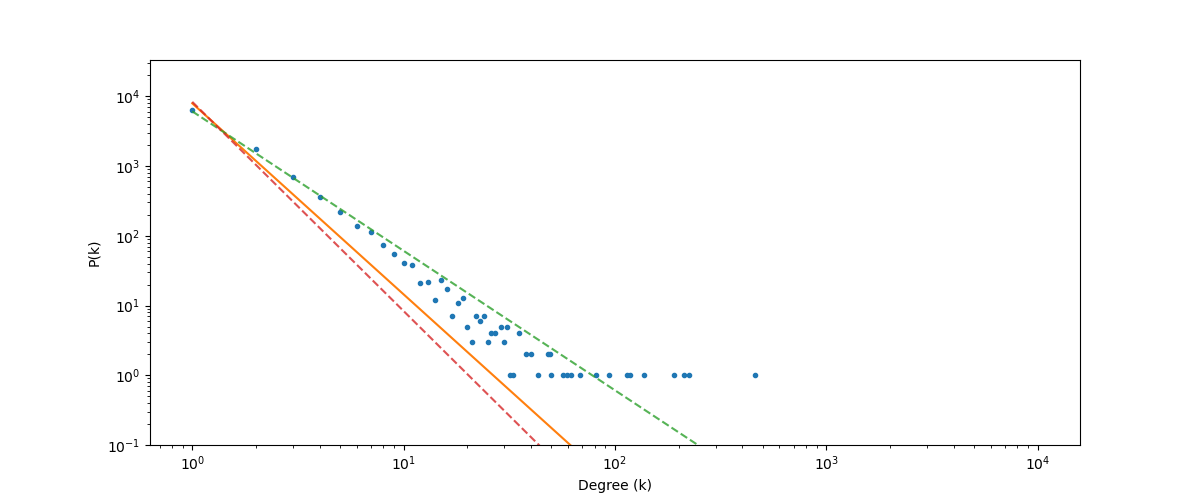

In [419]:
plt.close('all')
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.xscale('log')
plt.plot(deg,counts,'.',label='Degree distribution in the actual graph')

deg_probs = np.arange(1,n-1,dtype=float)**(-distribution_gamma)
deg_probs =  deg_probs/(deg_probs.sum())
plt.plot(np.arange(1,n-1),deg_probs*n,label=f'Expected distribution, $\\gamma={distribution_gamma:.3f}$')

#plt.plot(np.arange(1,n-1),deg_probs[1:]*n,label=f'Expected distribution, $\\gamma={gamma}$')#*90)


gamma_2 = 2
deg_probs_2 = np.arange(1,n-1,dtype=float)**(-gamma_2)
deg_probs_2 =  deg_probs_2/(deg_probs_2.sum())
plt.plot(np.arange(1,n-1),deg_probs_2*n,'--', label='Reference distribution, $\\gamma=2$',alpha=0.8)#*90)


gamma_3 = 3
deg_probs_3 = np.arange(1,n-1,dtype=float)**(-gamma_3)
deg_probs_3 = deg_probs_3/(deg_probs_3.sum())
plt.plot(np.arange(1,n-1),deg_probs_3*n,'--',label='Reference distribution, $\\gamma=3$',alpha=0.8)#*90)

plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.ylim(bottom=0.1)
plt.show()
plt.legend()

##### Metodo 2: da lista di valori attesi per i gradi
`nx.expected_degree_graph` crea un grafo data una lista di gradi attesi per ciascun nodo; il problema è che per rispettare la distribuzione, lascia molti nodi non connessi alla rete, quindi vorrebbe dire avere numero di nodi connessi variabile.

`nx.configuration_model` fa una cosa simile

In [420]:
n= 1000
gamma = 2.5
deg_probs = np.arange(1,n-1,dtype=float)**(-gamma)
deg_probs = np.concat(( np.array([0.]) , deg_probs/(deg_probs.sum()) ))

deg_extracted = np.random.multinomial(n,deg_probs) ## estraggo a caso dalla distribuzione i gradi
exp_degs = []
for deg,num in enumerate(deg_extracted):
  for i in range(num):
    exp_degs.append(deg)
exp_degs=exp_degs[::-1]

G = nx.expected_degree_graph(exp_degs,selfloops=False)

## Altre due funzioni che fanno una cosa simile, ed hanno lo stesso problema
# G = nx.configuration_model(exp_degs,create_using=nx.Graph)
# G.remove_edges_from(nx.selfloop_edges(G)) # toglie self-loops, e anche questo modifica la distribuzione di grado

# G = nx.havel_hakimi_graph(exp_degs,create_using=nx.Graph)

In [421]:
type(G) #grafo non diretto

networkx.classes.graph.Graph

In [ ]:
degrees = [d for n,d in G.degree()]
deg, counts = np.unique(degrees,return_counts=True)
deg,counts #ci sono ~250 nodi con grado 0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 20, 32,
        50]),
 array([321, 302, 204,  89,  26,  21,  10,   8,   4,   1,   3,   4,   1,
          1,   2,   1,   1,   1]))

In [ ]:
#ci sono tante componenti connesse, quella più grande di ~600 nodi
sorted([len(i) for i in list(nx.connected_components(G))] ,reverse=True)

[568,
 6,
 6,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

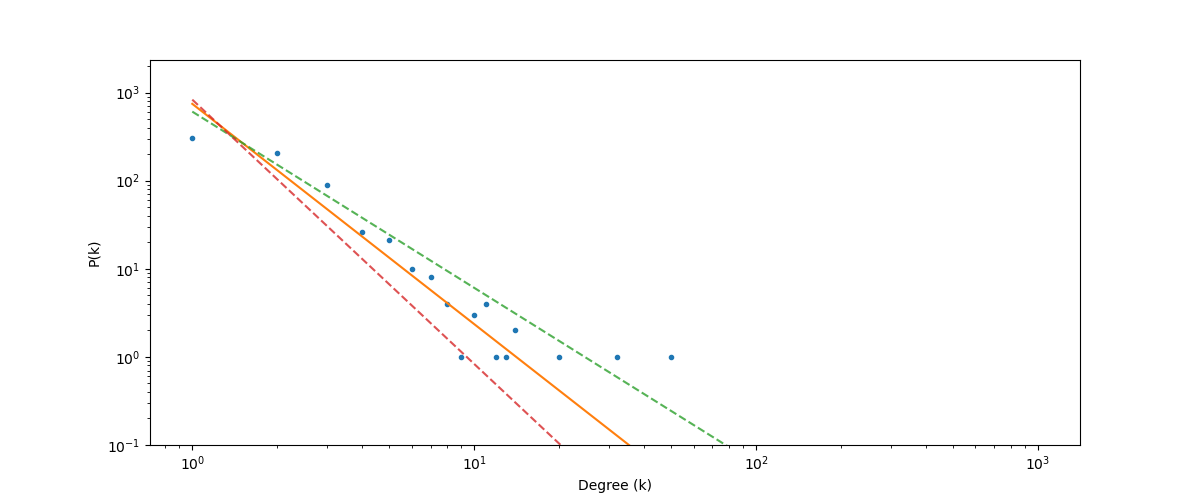

In [424]:
plt.close('all')
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.xscale('log')
plt.plot(deg,counts,'.',label='Degree distribution in the actual graph')
plt.plot(np.arange(1,n-1),deg_probs[1:]*n,label=f'Expected distribution, $\\gamma={gamma}$')#*90)


gamma_2 = 2
deg_probs_2 = np.arange(1,n-1,dtype=float)**(-gamma_2)
deg_probs_2 =  deg_probs_2/(deg_probs_2.sum())
plt.plot(np.arange(1,n-1),deg_probs_2*n,'--', label='Reference distribution, $\\gamma=2$',alpha=0.8)#*90)


gamma_3 = 3
deg_probs_3 = np.arange(1,n-1,dtype=float)**(-gamma_3)
deg_probs_3 = deg_probs_3/(deg_probs_3.sum())
plt.plot(np.arange(1,n-1),deg_probs_3*n,'--',label='Reference distribution, $\\gamma=3$',alpha=0.8)#*90)

plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.ylim(bottom=0.1)
plt.show()
plt.legend()

#### Caricamento da file csv
Esempio di come leggere un network salvato come edgelist

In [2]:
import os
import json

In [20]:
outputdir = os.path.join(".","outputs","update1","sim0")
datestr = "05_26_12_43"
filespath = os.path.join(outputdir,datestr)
G = nx.read_edgelist(os.path.join(filespath+"_edgelist.csv"), delimiter=',',nodetype=int)

with open(os.path.join(outputdir,"global_vars.json"),'r') as f:
  global_vars = json.load(f)

mus = np.load(filespath+"_mus.npy")
sigma2s = np.load(filespath+"_sigma2s.npy")

In [ ]:
for i in G.nodes:
  (G.nodes)[i]['mu'] = mus[-1][i]
  (G.nodes)[i]['sigma2']= sigma2s[-1][i]

In [5]:
len(G),len(mus[-1])

(1000, 1000)

In [6]:
(G.nodes[0])

{'mu': np.float64(0.058588983607106536),
 'sigma2': np.float64(0.0022171627683426434)}

In [22]:
DG=G.to_directed()

In [8]:
list(DG.edges)

[(445, 60),
 (445, 530),
 (445, 258),
 (60, 445),
 (60, 865),
 (60, 2),
 (60, 934),
 (60, 466),
 (60, 201),
 (703, 357),
 (357, 703),
 (357, 301),
 (357, 411),
 (357, 117),
 (357, 197),
 (357, 654),
 (570, 752),
 (752, 570),
 (752, 273),
 (59, 557),
 (557, 59),
 (557, 214),
 (95, 715),
 (715, 95),
 (715, 809),
 (298, 685),
 (298, 254),
 (298, 482),
 (685, 298),
 (596, 744),
 (744, 596),
 (744, 208),
 (744, 805),
 (744, 846),
 (744, 314),
 (744, 449),
 (744, 144),
 (457, 178),
 (457, 595),
 (457, 636),
 (457, 573),
 (457, 208),
 (178, 457),
 (178, 765),
 (169, 170),
 (169, 759),
 (170, 169),
 (170, 776),
 (170, 971),
 (170, 748),
 (170, 611),
 (170, 836),
 (170, 470),
 (170, 377),
 (823, 208),
 (208, 823),
 (208, 526),
 (208, 744),
 (208, 452),
 (208, 590),
 (208, 641),
 (208, 946),
 (208, 250),
 (208, 977),
 (208, 229),
 (208, 746),
 (208, 809),
 (208, 844),
 (208, 849),
 (208, 444),
 (208, 902),
 (208, 914),
 (208, 539),
 (208, 918),
 (208, 553),
 (208, 831),
 (208, 726),
 (208, 859),

In [23]:
for i,j in list(DG.edges):
  if (DG.nodes[i]['mu']-DG.nodes[j]['mu']) <= global_vars['beta']*(DG.nodes[i]['sigma2']):
    DG.edges[i,j]['strong'] = True
  else:
    DG.edges[i,j]['strong'] = False
    DG.remove_edge(i,j)

In [ ]:
weak =[(i,j) for i in  DG.edges if DG.edges(i,j)]

In [152]:
DG.edges(0),DG.edges[1, 176], DG.edges[176,1]

(OutEdgeDataView([(0, 875)]), {'strong': True}, {'strong': True})

In [154]:
DG.edges(1)

OutEdgeDataView([(1, 176), (1, 976), (1, 381)])

In [157]:
DG.edges.data('strong')

OutEdgeDataView([(445, 530, True), (445, 258, True), (60, 445, True), (60, 865, True), (60, 2, True), (60, 934, True), (60, 466, True), (60, 201, True), (703, 357, True), (357, 703, True), (357, 301, True), (357, 411, True), (357, 117, True), (357, 197, True), (357, 654, True), (570, 752, True), (752, 570, True), (752, 273, True), (59, 557, False), (557, 59, True), (557, 214, True), (95, 715, True), (715, 95, True), (715, 809, True), (298, 685, True), (298, 254, True), (298, 482, True), (685, 298, True), (596, 744, True), (744, 596, True), (744, 208, True), (744, 805, True), (744, 846, True), (744, 314, True), (744, 449, True), (744, 144, True), (457, 178, True), (457, 595, True), (457, 636, False), (457, 573, True), (457, 208, True), (178, 457, True), (178, 765, True), (169, 170, True), (169, 759, True), (170, 169, True), (170, 776, True), (170, 971, True), (170, 748, True), (170, 611, True), (170, 836, True), (170, 470, True), (170, 377, False), (823, 208, True), (208, 823, True), (2

In [26]:
conn_comp = (list(nx.strongly_connected_components(DG)))
dims = [len(i) for i in conn_comp]

In [27]:
sorted(dims)[::-1]

[172,
 143,
 25,
 23,
 20,
 15,
 15,
 14,
 13,
 12,
 11,
 9,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [19]:
DG.adjacency()

In [28]:
conn_comp[np.argmax(dims)]

{9,
 14,
 15,
 18,
 28,
 38,
 43,
 45,
 50,
 64,
 68,
 87,
 90,
 92,
 97,
 98,
 99,
 105,
 109,
 113,
 116,
 123,
 126,
 129,
 132,
 135,
 139,
 157,
 162,
 166,
 181,
 184,
 185,
 189,
 191,
 199,
 202,
 207,
 211,
 213,
 215,
 217,
 224,
 227,
 232,
 233,
 235,
 237,
 240,
 241,
 242,
 245,
 255,
 260,
 261,
 263,
 274,
 275,
 277,
 279,
 290,
 300,
 310,
 315,
 325,
 333,
 339,
 360,
 363,
 366,
 374,
 382,
 383,
 384,
 385,
 391,
 393,
 396,
 403,
 423,
 425,
 428,
 432,
 434,
 440,
 448,
 471,
 475,
 478,
 481,
 488,
 495,
 500,
 503,
 504,
 506,
 515,
 529,
 543,
 548,
 552,
 554,
 555,
 560,
 571,
 582,
 584,
 597,
 598,
 606,
 615,
 619,
 632,
 635,
 637,
 638,
 644,
 648,
 651,
 658,
 659,
 666,
 689,
 691,
 704,
 709,
 716,
 729,
 737,
 749,
 760,
 768,
 779,
 785,
 789,
 791,
 794,
 802,
 812,
 813,
 814,
 815,
 817,
 819,
 821,
 826,
 833,
 848,
 850,
 853,
 857,
 868,
 879,
 882,
 901,
 907,
 917,
 921,
 924,
 932,
 939,
 950,
 954,
 966,
 968,
 973,
 974,
 980,
 982,
 985

In [31]:
a = 0
for i in conn_comp[np.argmax(dims)]:
  a+=DG.nodes[i]['mu']

In [32]:
a/len(conn_comp[np.argmax(dims)])

np.float64(-0.059997669302831694)

In [160]:
nx.connected_components(G)#key='strong'),sorted(dims)#, weight='strong')

<generator object connected_components at 0x7f9756cebb40>

In [80]:
for key in G:
  #key['mu'] = mus[-1][key]
  print(key)
  #i+=1


445
60
703
357
570
752
59
557
95
715
298
685
596
744
457
178
169
170
823
208
716
709
403
939
382
737
54
528
48
996
551
171
555
691
907
129
22
187
677
105
604
781
381
408
100
388
4
955
343
299
680
986
359
804
963
632
141
849
662
424
497
772
109
702
972
452
766
125
652
779
181
273
494
517
282
735
217
285
714
736
189
523
761
326
712
526
372
216
147
82
438
112
530
122
280
436
3
829
508
264
13
664
134
161
317
869
200
427
983
598
393
1
176
215
503
985
673
312
930
286
608
172
549
475
706
146
834
258
460
185
166
648
767
223
373
467
778
500
789
854
263
956
251
474
848
968
363
504
810
859
397
661
950
245
768
244
428
352
390
114
636
531
319
88
433
10
887
154
152
16
225
674
641
540
233
232
793
721
942
313
776
872
39
850
923
580
70
548
471
194
155
838
969
160
620
57
710
198
199
974
788
843
880
686
7
938
614
742
358
281
728
573
610
933
78
340
699
515
813
222
339
928
301
369
429
590
592
483
180
72
193
943
753
76
81
707
645
338
453
858
102
28
9
658
806
688
790
464
484
168
971
724
509
924
891
501
420
1

In [74]:
G.edges(0)

EdgeDataView([(0, 875)])

In [75]:
G.nodes[442]

{'mu': np.float64(0.10574754442451326)}

In [72]:
sorted((d,n) for n, d in G.degree())

[(1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 8),
 (1, 11),
 (1, 15),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 33),
 (1, 36),
 (1, 37),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 55),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 62),
 (1, 63),
 (1, 64),
 (1, 66),
 (1, 67),
 (1, 69),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 77),
 (1, 79),
 (1, 80),
 (1, 82),
 (1, 83),
 (1, 84),
 (1, 86),
 (1, 87),
 (1, 89),
 (1, 91),
 (1, 92),
 (1, 93),
 (1, 95),
 (1, 96),
 (1, 97),
 (1, 98),
 (1, 99),
 (1, 100),
 (1, 101),
 (1, 102),
 (1, 103),
 (1, 104),
 (1, 105),
 (1, 106),
 (1, 107),
 (1, 108),
 (1, 111),
 (1, 113),
 (1, 115),
 (1, 116),
 (1, 117),
 (1, 118),
 (1, 119),
 (1, 120),
 (1, 121),
 (1, 122),
 (1, 123),
 (1, 124),
 (1, 125),
 (1, 126),
 (1, 128),
 (1, 129),
 (1, 131),
 (1, 132),
 (1, 135),
 (1, 136),
 (1, 137),
 (1, 139),
 (1, 